In [1]:
install.packages("MASS")
library("MASS")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")
install.packages("mltest")
library("mltest")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpK4uror\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpK4uror\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpK4uror\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'mltest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpK4uror\downloaded_packages


In [2]:
ionomics <- read.csv('geneva_x_transformed.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics = ionomics[0:200,]

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics[training.samples, ]
test.data <- ionomics[-training.samples, ]

In [4]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"


[1] NA

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
         1          2          3          4          5          6          7 
0.05769231 0.02564103 0.14743590 0.21794872 0.01923077 0.33974359 0.12820513 
         8 
0.06410256 

Group means:
          B11       Na23       Mg26        Al27        P31         S34
1 -0.20413703 -0.6097338 -0.6031628 -0.32026011 -0.5299490 -0.29234505
2 -0.56855996 -0.2754358  0.1039312 -0.01880003  0.3240124 -0.17506390
3 -0.33410156  0.8003434  0.4190788  0.31218610  0.5177615  0.17218223
4  0.02540261  0.3807672  0.3645134  0.19415003 -0.3033800 -0.20339695
5  1.45399662  1.3291735 -0.3164298  1.15952835  1.2932896 -0.21297315
6  0.18891251 -0.1503568 -0.1196113 -0.18664608 -0.1057261  0.25722385
7 -0.01336292 -0.3620363  0.0887498 -0.74547059  0.6451780  0.08094988
8 -0.25629713 -0.5270073 -1.2612825  0.07669735 -1.0195904 -0.61762220
         K39        Ca44        Fe54        Mn55       Co59        Ni60
1  0.7119569 -0.3

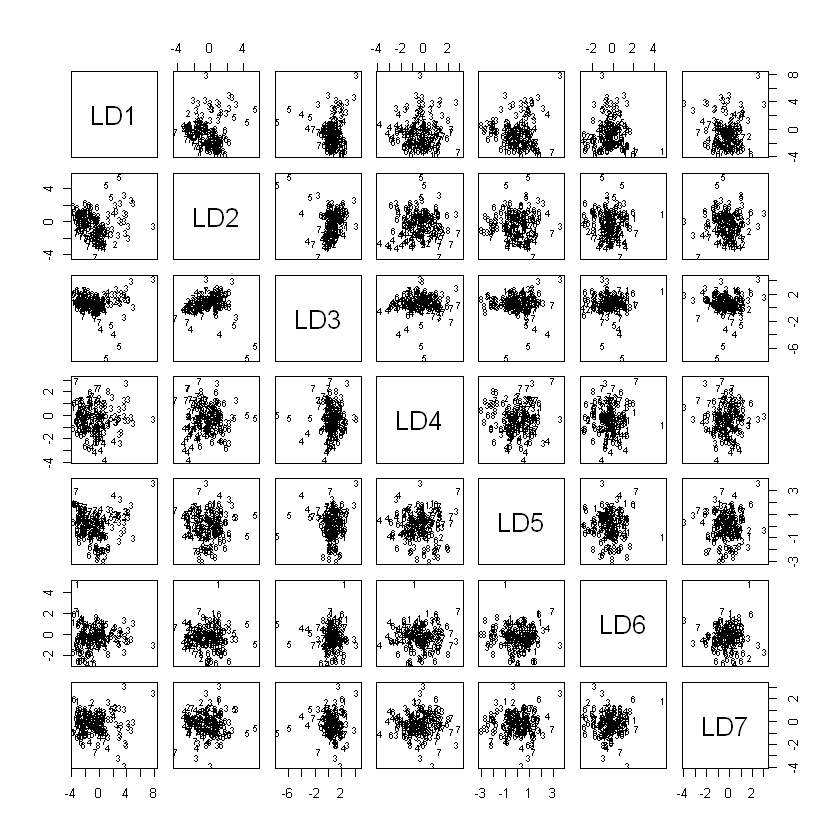

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 6 6 4 4 4 6
Levels: 1 2 3 4 5 6 7 8

,1,2,3,4,5,6,7,8
2,0.0942912652,0.003522771,3.710866e-06,0.06635810,5.632901e-14,0.51801711,0.2795999749,0.0382070706
4,0.0694830079,0.004039150,3.482549e-08,0.01481104,5.085543e-23,0.77321331,0.1379283900,0.0005250690
5,0.0002428989,0.001607647,2.219441e-06,0.94033686,1.140371e-18,0.04462126,0.0001130557,0.0130760626
15,0.0004095844,0.008725529,3.958299e-04,0.89154044,4.174732e-15,0.06864521,0.0103739561,0.0199094459
16,0.0004027620,0.065516911,7.492769e-04,0.61436368,1.696748e-16,0.24117171,0.0164189922,0.0613766667
24,0.0025253179,0.001192899,8.961888e-04,0.04969571,6.007663e-22,0.88779496,0.0572445964,0.0006503269


,LD1,LD2,LD3,LD4,LD5,LD6,LD7
2,-0.9626955,0.09366305,-0.8029674,0.9359172,-0.41255730,1.24859350,-0.189033
4,-2.1271130,-0.89204206,1.1302267,0.4689859,0.01180944,-0.20113108,1.236746
5,-0.2846056,-0.70943541,0.1282337,-2.7798183,-2.06910380,0.01766134,0.740538


In [7]:
table <- table(Predicted=predictions$class, spec_as_int=test.data$spec_as_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

         spec_as_int
Predicted  1  2  3  4  5  6  7  8
        1  0  0  0  0  0  1  0  0
        2  0  0  0  0  0  0  0  0
        3  0  0  4  0  1  0  0  0
        4  1  2  0  5  0  0  3  0
        5  0  0  0  0  1  0  0  0
        6  2  0  1  1  0 13  0  0
        7  0  0  0  0  0  0  3  0
        8  0  0  0  0  0  0  0  1

Overall Statistics
                                          
               Accuracy : 0.6923          
                 95% CI : (0.5243, 0.8298)
    No Information Rate : 0.359           
    P-Value [Acc > NIR] : 2.378e-05       
                                          
                  Kappa : 0.5993          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.00000  0.00000   0.8000   0.8333  0.50000   0.9286
Specificity           0.97222  1.00000   0.9706   0.8182  1.

In [8]:
mn.net <- nnet::multinom(spec_as_int ~ ., train.data)
ionomics.predictions <- predict(mn.net, newdata=test.data, type="prob")
ionomics.predictions <- as.data.frame(ionomics.predictions)
auc <- multiclass.roc(test.data$spec_as_int, ionomics.predictions, percent=TRUE)
print(auc)

# weights:  168 (140 variable)
initial  value 324.392881 
iter  10 value 56.684734
iter  20 value 36.013379
iter  30 value 19.924572
iter  40 value 0.974881
iter  50 value 0.008756
final  value 0.000062 
converged


ERROR: Error in multiclass.roc(test.data$spec_as_int, ionomics.predictions, percent = TRUE): could not find function "multiclass.roc"


In [9]:
spec.af <- factor(test.data$spec_as_int, levels = c("1","2","3","4","5","6","7","8"))
class.af <- factor(predictions$class, levels = c("1","2","3","4","5","6","7","8"))

In [10]:
classifier_metrics <- ml_test(class.af, spec.af, output.as.table = TRUE)
F1 <- classifier_metrics$F1
accuracy <- classifier_metrics$accuracy

In [11]:
classifier_metrics

,balanced.accuracy,DOR,F0.5,F1,F2,FDR,FNR,FOR,FPR,geometric.mean,...,L,lambda,MCC,MK,NPV,OP,precision,recall,specificity,Youden
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4821429,0.00000,NaN,NaN,NaN,1.0000000,1.00000000,0.10000000,0.03571429,0.0000000,...,0.000000,1.03703704,-0.05976143,-0.1000000,0.9000000,-0.3076923,0.0000000,0.0000000,0.9642857,-0.03571429
2,0.5000000,NaN,NaN,NaN,NaN,NaN,1.00000000,0.06896552,0.00000000,0.0000000,...,NaN,1.00000000,NaN,NaN,0.9310345,-0.3076923,NaN,0.0000000,1.0000000,0.00000000
3,0.8791667,92.00000,0.8000000,0.8000000,0.8000000,0.2000000,0.20000000,0.04166667,0.04166667,0.8755950,...,19.200000,0.20869565,0.75833333,0.7583333,0.9583333,0.6022603,0.8000000,0.8000000,0.9583333,0.75833333
4,0.8095238,18.33333,0.5000000,0.5882353,0.7142857,0.5454545,0.16666667,0.04347826,0.21428571,0.8091736,...,3.888889,0.21212121,0.50445036,0.4110672,0.9565217,0.6628959,0.4545455,0.8333333,0.7857143,0.61904762
5,0.7500000,Inf,0.8333333,0.6666667,0.5555556,0.0000000,0.50000000,0.03703704,0.00000000,0.7071068,...,Inf,0.50000000,0.69388867,0.9629630,0.9629630,0.3589744,1.0000000,0.5000000,1.0000000,0.50000000
6,0.8531746,45.50000,0.7926829,0.8387097,0.8904110,0.2352941,0.07142857,0.06666667,0.22222222,0.8498366,...,4.178571,0.09183673,0.70218192,0.6980392,0.9333333,0.6039356,0.7647059,0.9285714,0.7777778,0.70634921
7,0.7500000,Inf,0.8333333,0.6666667,0.5555556,0.0000000,0.50000000,0.11111111,0.00000000,0.7071068,...,Inf,0.50000000,0.66666667,0.8888889,0.8888889,0.3589744,1.0000000,0.5000000,1.0000000,0.50000000
8,1.0000000,Inf,1.0000000,1.0000000,1.0000000,0.0000000,0.00000000,0.00000000,0.00000000,1.0000000,...,Inf,0.00000000,1.00000000,1.0000000,1.0000000,0.6923077,1.0000000,1.0000000,1.0000000,1.00000000
